<img src="https://sdv.dev/SDV/_static/SDV.png" align="left" alt="Python image" width = "300">

[Home](https://sdv.dev/SDV/index.html) | 
[Getting-Started](https://sdv.dev/SDV/getting_started/index.html) | 
[User-Guides](https://sdv.dev/SDV/user_guides/index.html) | 
[API-Reference](https://sdv.dev/SDV/api_reference/index.html) | 
[Developer-Guides](https://sdv.dev/SDV/developer_guides/index.html) | 
[Release-Notes](https://sdv.dev/SDV/history.html)
***

# Synthetic Data Vault

The [Synthetic Data Vault (SDV)](https://sdv.dev/SDV/) is a Synthetic Data Generation ecosystem of libraries that allows users to easily learn single-table, multi-table and timeseries datasets to later on generate new Synthetic Data that has the same format and statistical properties as the original dataset.

Synthetic data can then be used to supplement, augment and in some cases replace real data when training Machine Learning models. Additionally, it enables the testing of Machine Learning or other data dependent software systems without the risk of exposure that comes with data disclosure.

Underneath the hood it uses several probabilistic graphical modeling and deep learning based techniques. To enable a variety of data storage structures, we employ unique hierarchical generative modeling and recursive sampling techniques.



## Quickstart

In this short tutorial we will guide you through a series of steps that will help you getting started using SDV.

## Model the dataset using SDV
To model a multi table, relational dataset, we follow two steps. In the first step, we will load the data and configures the meta data. In the second step, we will use the SDV API to fit and save a hierarchical model. We will cover these two steps in this section using an example dataset.

## Load example data
SDV comes with a toy dataset to play with, which can be loaded using the sdv.load_demo function:

In [1]:
# pip install sdv
# for mac brew install graphviz
from sdv import load_demo

In [2]:
metadata, tables = load_demo(metadata=True)

## This will return two objects:

A `Metadata object` with all the information that **SDV** needs to know about the dataset.

In [3]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

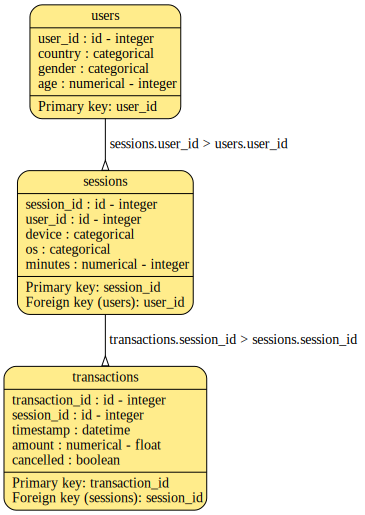

In [5]:
metadata.visualize()

For more details about how to build the Metadata for your own dataset, please refer to the [Relational Metadata guide](https://hub.gke2.mybinder.org/user/sdv-dev-sdv-qwqhui25/notebooks/tutorials/relational_data/01_Relational_Metadata.ipynb).

A dictionary containing three pandas.DataFrames with the tables described in the metadata object.

In [6]:
tables

{'users':    user_id country gender  age
 0        0      US      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4      US      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile  android       23
 1           1        1  tablet      ios       12
 2           2        2  tablet  android        8
 3           3        3  mobile  android       13
 4           4        4  mobile      ios        9
 5           5        5  mobile  android       32
 6           6        6  mobile      ios        7
 7           7        7  tablet      ios       21
 8           8        8  mobile      ios       29
 9           9        9  tablet      ios       34,
 'transactions':    transaction_id  session_id           timestamp  amount 

## Fit a model using the SDV API.
First, we build a hierarchical statistical model of the data using SDV. For this we will create an instance of the sdv.SDV class and use its fit method.

During this process, SDV will traverse across all the tables in your dataset following the primary key-foreign key relationships and learn the probability distributions of the values in the columns.

In [7]:
from sdv import SDV

In [8]:
sdv = SDV()

In [9]:
sdv.fit(metadata, tables)


/usr/local/lib/python3.9/site-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column '__sessions__user_id__univariates__device__loc'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/rdt/transformers/numerical.py:100: UserWarning: No rounding scheme detected for column '__sessions__user_id__univariates__os__loc'. Data will not be rounded.
  warnings.warn(


## Sample data from the fitted model
Once the modeling has finished you are ready to generate new synthetic data using the sdv instance that you have.

For this, all you have to do is call the sample_all method from your instance passing the number of rows that you want to generate:

In [10]:
sampled = sdv.sample_all()

This will return a dictionary identical to the tables one that we passed to the SDV instance for learning, filled in with new synthetic data.

## Note

Only the parent tables of your dataset will have the specified number of rows, as the number of child rows that each row in the parent table has is also sampled following the original distribution of your dataset.

In [11]:
sampled

{'users':    user_id country gender  age
 0        0      UK      M   23
 1        1      ES    NaN   33
 2        2      DE    NaN   41
 3        3      UK      M   39
 4        4      DE    NaN   45
 5        5      UK      M   47
 6        6      US    NaN   22
 7        7      FR      M   41
 8        8      BG      M   22
 9        9      US      F   30,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile      ios       29
 1           1        1  mobile  android       34
 2           2        2  mobile      ios       31
 3           3        3  tablet  android       23
 4           4        4  mobile      ios       25
 5           5        5  mobile  android        7
 6           6        6  tablet      ios       18
 7           7        7  mobile      ios       17
 8           8        8  tablet  android        9
 9           9        9  mobile      ios       15,
 'transactions':    transaction_id  session_id           timestamp  amount 

## Saving and Loading your model
In some cases, you might want to save the fitted SDV instance to be able to generate synthetic data from it later or on a different system.

In order to do so, you can save your fitted SDV instance for later usage using the save method of your instance.


In [13]:
sdv.save('sdv.pkl')

The generated pkl file will not include any of the original data in it, so it can be safely sent to where the synthetic data will be generated without any privacy concerns.

Later on, in order to sample data from the fitted model, we will first need to load it from its pkl file.

In [14]:
sdv = SDV.load('sdv.pkl')

After loading the instance, we can sample synthetic data using its sample_all method like before.

In [15]:
sampled = sdv.sample_all(5)

In [16]:
sampled

{'users':    user_id country gender  age
 0       10      US      M   40
 1       11      ES    NaN   45
 2       12      UK    NaN   22
 3       13      ES      F   29
 4       14      US      F   35,
 'sessions':    session_id  user_id  device       os  minutes
 0          10       10  tablet      ios       18
 1          11       11  tablet  android       14
 2          12       12  mobile  android       30
 3          13       13  mobile      ios       31
 4          14       14  mobile      ios       18,
 'transactions':    transaction_id  session_id           timestamp  amount  cancelled
 0              10          10 2019-01-27 04:42:05   122.6       True
 1              11          11 2019-01-15 00:36:50   102.3      False
 2              12          12 2019-01-20 17:50:19   102.6      False
 3              13          13 2019-01-09 22:38:13    68.4      False
 4              14          14 2019-01-10 19:17:49    84.9      False}